In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import json
from datetime import datetime as dt
import random

In [2]:
%%javascript
OutputArea.prototype._should_scroll = function(){return false}

<IPython.core.display.Javascript object>

In [3]:
pd.set_option('display.max_colwidth', None, "display.max_rows", None, "display.max_columns", None)
pd.options.mode.chained_assignment = None

In [4]:
load_csv = (lambda config: pd.read_csv(f'./data/{config}.csv', delimiter=',', index_col=0))

df_configs = {config: load_csv(config) for config in [
    "1tls_2x2",
    "1tls_3x3",
    "1tls_4x4",
    "2tls_3x3x2",
    "4tls_3x3x2x2"
]}

In [5]:
for config in df_configs:
    for col in ['sum_acc_waiting_time', 'sum_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']:
        df_configs[config][col] /= int(config[0])

In [6]:
for config in df_configs:
    print(config)
    display(df_configs[config].head(2))

1tls_2x2


,avg_acc_waiting_time,avg_delay,avg_queue_length,avg_waiting_time,con,con_p_rate,ctrl_con_p_rate,ctrl_con_p_rate_round,ep,id,id_con,sum_acc_waiting_time,sum_delay,sum_queue_length,sum_waiting_time,veh_n,veh_n_p_hour
0,238.258406,0.896514,5.580298,27.384255,False,1.000,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_def,18650.903974,65.835718,44.642384,2267.880795,72.238411,"[1000.0, 200.0, 500.0, 200.0]"
1,285.894061,0.908987,7.187309,61.863058,True,0.137,0.137,0.1,1,rlcontroller,rlcontroller_con,25681.363914,74.400690,57.498471,6179.400612,80.507645,"[1000.0, 200.0, 500.0, 200.0]"


1tls_3x3


,avg_acc_waiting_time,avg_delay,avg_queue_length,avg_waiting_time,con,con_p_rate,ctrl_con_p_rate,ctrl_con_p_rate_round,ep,id,id_con,sum_acc_waiting_time,sum_delay,sum_queue_length,sum_waiting_time,veh_n,veh_n_p_hour
0,9.055964,0.687747,0.702381,8.749424,False,1.000,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_def,223.338776,16.805420,8.428571,215.371429,24.269388,"[1000.0, 200.0, 500.0, 200.0]"
1,203.804758,0.852609,3.132212,188.822534,True,0.137,0.137,0.1,1,rlcontroller,rlcontroller_con,11968.121795,48.423799,37.586538,10841.759615,55.900641,"[1000.0, 200.0, 500.0, 200.0]"


1tls_4x4


,avg_acc_waiting_time,avg_delay,avg_queue_length,avg_waiting_time,con,con_p_rate,ctrl_con_p_rate,ctrl_con_p_rate_round,ep,id,id_con,sum_acc_waiting_time,sum_delay,sum_queue_length,sum_waiting_time,veh_n,veh_n_p_hour
0,8.246283,0.693988,0.552428,7.890754,False,1.000,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_def,204.859504,16.955061,8.838843,196.115702,24.318182,"[1000.0, 200.0, 500.0, 200.0]"
1,51.144938,0.846146,2.164352,42.720889,True,0.137,0.137,0.1,1,rlcontroller,rlcontroller_con,2996.393939,45.624871,34.629630,2514.006734,53.070707,"[1000.0, 200.0, 500.0, 200.0]"


2tls_3x3x2


,avg_acc_waiting_time,avg_delay,avg_queue_length,avg_waiting_time,con,con_p_rate,ctrl_con_p_rate,ctrl_con_p_rate_round,ep,id,id_con,sum_acc_waiting_time,sum_delay,sum_queue_length,sum_waiting_time,veh_n,veh_n_p_hour
0,344.771221,0.916623,6.549949,51.101670,False,1.000,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_def,42013.139959,97.972948,78.599391,6375.280933,104.594320,"[1000.0, 200.0, 500.0, 200.0, 800.0, 800.0]"
1,263.442550,0.902848,6.055777,183.320195,True,0.137,0.137,0.1,1,rlcontroller,rlcontroller_con,31617.873003,84.910925,72.669329,22276.448882,92.163738,"[1000.0, 200.0, 500.0, 200.0, 800.0, 800.0]"


4tls_3x3x2x2


,avg_acc_waiting_time,avg_delay,avg_queue_length,avg_waiting_time,con,con_p_rate,ctrl_con_p_rate,ctrl_con_p_rate_round,ep,id,id_con,sum_acc_waiting_time,sum_delay,sum_queue_length,sum_waiting_time,veh_n,veh_n_p_hour
0,377.946516,0.907030,7.774299,150.079086,False,1.000,0.137,0.1,1,maxpressurebaseline,maxpressurebaseline_def,58638.204523,113.628574,93.291586,22961.885944,121.461576,"[1000.0, 200.0, 500.0, 200.0, 800.0, 800.0, 800.0, 700.0]"
1,231.714988,0.891877,6.110770,119.542493,True,0.137,0.137,0.1,1,rlcontroller,rlcontroller_con,26978.262695,89.681054,73.329238,14307.964169,98.613022,"[1000.0, 200.0, 500.0, 200.0, 800.0, 800.0, 800.0, 700.0]"


In [7]:
make_palette = (lambda unique: dict(zip(unique, sns.color_palette(n_colors=len(unique)))))

c_palette = make_palette([
    'rlcontroller_con', 'rlcontroller_def',
    'maxpressurebaseline_def', 'sotlbaseline_def',
    '1tls_2x2', '1tls_3x3', '1tls_4x4',
    '2tls_3x3x2', '4tls_3x3x2x2', '9tls_3x3x3x3'
])

In [8]:
titles = {
    "1tls_2x2": ["(a)", "1 TL, 2 phases, 2x2 lanes"],
    "1tls_3x3": ["(b)", "1 TL, 4 phases, 3x3 lanes"],
    "1tls_4x4": ["(c)", "1 TL, 4 phases, 4x4 lanes"],
    "2tls_3x3x2": ["(d)", "2 TL, 4 phases, 3x3 lanes"],
    "4tls_3x3x2x2": ["(e)", "4 TL, 4 phases, 3x3 lanes"],
    "9tls_3x3x3x3": ["(f)", "9 TL, 4 phases, 3x3 lanes"],
    
    "ep": "Episode", 
    "id_con": "Algorithm",
    "config": "Scenario",
    "config_l": "Scenario",
    "ctrl_con_p_rate": "CV penetration rate",
    "ctrl_con_p_rate_round": "CV penetration rate",
    "ctrl_con_p_rate_round_l": "CV penetration rate",
    
    "sum_acc_waiting_time": "Mean total accumutaled waiting time", 
    "sum_waiting_time": "Mean total waiting time", 
    "sum_delay": "Mean total delay",
    "sum_queue_length": "Mean total queue length", 
    "avg_acc_waiting_time": "Mean accumutaled waiting time", 
    "avg_waiting_time": "Mean waiting time", 
    "avg_delay": "Mean delay", 
    "avg_queue_length": "Mean queue length", 
    "veh_n": "Mean total volume", 
    
    "mean": "Mean", 
    "median": "Median", 
    "quantile_25": "First quartile", 
    "quantile_75": "Third quartile", 
    "var": "Variance", 
    "std": "Standard deviation",
    
    "rlcontroller_con": "DQN partial detection",
    "rlcontroller_def": "DQN full detection",
    "maxpressurebaseline_def": "Max Pressure full detection",
    "sotlbaseline_def": "SOTL full detection"
}

In [9]:
df_stats = pd.DataFrame(columns=['config', 'id_con'])

for config in df_configs:
    for col in ['sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']:
        for id_con in ['rlcontroller_def', 'maxpressurebaseline_def', 'sotlbaseline_def']:
            df_stats = pd.concat([
                df_stats,
                pd.DataFrame({
                    'config': [config],
                    'id_con': [id_con], 
                    'mean_sum_acc_waiting_time': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_acc_waiting_time'].mean()], 
                    'mean_sum_delay': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_delay'].mean()], 
                    'mean_sum_queue_length': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_queue_length'].mean()], 
                    'mean_veh_n': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'veh_n'].mean()],
                    'median_sum_acc_waiting_time': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_acc_waiting_time'].median()], 
                    'median_sum_delay': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_delay'].median()], 
                    'median_sum_queue_length': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_queue_length'].median()], 
                    'median_veh_n': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'veh_n'].median()],
                    'quantile_25_sum_acc_waiting_time': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_acc_waiting_time'].quantile([0.25]).tolist()[0]], 
                    'quantile_25_sum_delay': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_delay'].quantile([0.25]).tolist()[0]], 
                    'quantile_25_sum_queue_length': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_queue_length'].quantile([0.25]).tolist()[0]], 
                    'quantile_25_veh_n': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'veh_n'].quantile([0.25]).tolist()[0]],
                    'quantile_75_sum_acc_waiting_time': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_acc_waiting_time'].quantile([0.75]).tolist()[0]], 
                    'quantile_75_sum_delay': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_delay'].quantile([0.75]).tolist()[0]], 
                    'quantile_75_sum_queue_length': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_queue_length'].quantile([0.75]).tolist()[0]], 
                    'quantile_75_veh_n': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'veh_n'].quantile([0.75]).tolist()[0]],
                    'var_sum_acc_waiting_time': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_acc_waiting_time'].var()], 
                    'var_sum_delay': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_delay'].var()], 
                    'var_sum_queue_length': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_queue_length'].var()], 
                    'var_veh_n': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'veh_n'].var()],
                    'std_sum_acc_waiting_time': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_acc_waiting_time'].std()], 
                    'std_sum_delay': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_delay'].std()], 
                    'std_sum_queue_length': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'sum_queue_length'].std()], 
                    'std_veh_n': [df_configs[config].loc[df_configs[config]['id_con'] == id_con, 'veh_n'].std()],
                })
            ])
        
df_stats = df_stats.reset_index(drop=True)

In [10]:
df_stats_con = pd.DataFrame(columns=['config', 'ctrl_con_p_rate_round'])

def get_df_con_config(config, df_config):
    ids = ['rlcontroller_con', 'rlcontroller_def']
    cols = ['ctrl_con_p_rate_round', 'sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']
    
    df_config.loc[df_config['ctrl_con_p_rate_round'] == 1., 'ctrl_con_p_rate_round'] = 0.9
    df_con = df_config.loc[df_config['id_con'] == ids[0], cols].groupby(['ctrl_con_p_rate_round']).sum().reset_index()
    df_def = df_config.loc[df_config['id_con'] == ids[1], cols].groupby(['ctrl_con_p_rate_round']).sum().reset_index()
    
    df = pd.DataFrame({
        col: [pd.Series(
            [df_con.loc[df_con['ctrl_con_p_rate_round'] == i/10, col].values[0], 
             df_def.loc[df_def['ctrl_con_p_rate_round'] == i/10, col].values[0]]
        ).pct_change()[1] for i in range(10)] for col in cols[1:]
    })
    df['ctrl_con_p_rate_round'] = [i/10 for i in range(10)]
    df['config'] = config
    df = df.reset_index(drop=True)
    return df


for config in df_configs:
    df_stats_con = pd.concat([
        df_stats_con,
        get_df_con_config(config, df_configs[config])
    ])

df_stats_con = df_stats_con.reset_index(drop=True)

In [11]:
def plot_density(config, d):
    h, w = 2, 2

    fig, axes = plt.subplots(h, w, figsize=(20, 10))

    hue = 'id_con'
    data = df_configs[config].loc[df_configs[config][hue].isin(d)]
    y = ['sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']
    hues = data[hue].unique().tolist()

    fig.suptitle(f'{" ".join(titles[config])}: {", ".join(sorted([titles[t] for t in hues]))} (1000 episodes)', fontsize=16)

    for a in range(h * w):
        i, j = (a // w) % h, a % w
        for k in hues:
            sns.kdeplot(ax=axes[i, j], data=data.loc[data[hue] == k][y[a]], color=c_palette[k])
        axes[i, j].set_title(f'{titles[y[a]]} (episode density)')
        axes[i, j].set(xlabel=titles[y[a]])
        axes[i, j].legend(handles=[
            patches.Patch(color=c_palette[k], label=l) for (l, k) in 
            sorted([(titles[k], k) for k in hues])
        ], loc=1)
        None

In [12]:
def plot_stats():
    h, w = 6, 4

    fig, axes = plt.subplots(h, w, figsize=(20, 5 * h))

    x = 'config_l'
    data = df_stats
    data[x] = data['config']

    data = data.replace({
        x: {t: titles[t][0] 
            for t in ['1tls_2x2', '1tls_3x3', '1tls_4x4', '2tls_3x3x2', '4tls_3x3x2x2', '9tls_3x3x3x3']}
    })

    y1 = ['sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']
    y2 = ['mean', 'median', 'quantile_25', 'quantile_75', 'var', 'std']
    hue = 'id_con'
    hues = data[hue].unique().tolist()

    fig.suptitle(f'Full detection: {", ".join([titles[t] for t in y2])} by {titles[x]} (1000 episodes)', fontsize=16, y=.91)

    for a in range(h * w):
        i, j = (a // w) % h, a % w
        sns.barplot(ax=axes[i, j], data=data, x=x, y=y2[i] + '_' + y1[j], hue="id_con", dodge=True, palette=c_palette)
        axes[i, j].set_title(f'{titles[y2[i]]}')
        axes[i, j].set(xlabel=titles[x], ylabel=titles[y1[j]])
        axes[i, j].legend(handles=[
            patches.Patch(color=c_palette[k], label=l) for (l, k) in 
            sorted([(titles[k], k) for k in hues])
        ], loc=1)
    None

In [13]:
def plot_line(config, d, x):
    h, w = 2, 2

    fig, axes = plt.subplots(h, w, figsize=(20, 10))

    data = df_configs[config].loc[df_configs[config]['id_con'].isin(d)]
    y = ['sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']
    hue = 'id_con'
    hues = data[hue].unique().tolist()

    fig.suptitle(f'{" ".join(titles[config])}: {", ".join(sorted([titles[t] for t in hues]))} (1000 episodes)', fontsize=16)

    for a in range(h * w):
        i, j = (a // w) % h, a % w
        sns.lineplot(ax=axes[i, j], data=data, x=x, y=y[a], hue=hue, palette=c_palette)
        axes[i, j].set_title(f'{titles[y[a]]} / {titles[x]}')
        axes[i, j].set(xlabel=titles[x], ylabel=titles[y[a]])
        axes[i, j].legend(handles=[
            patches.Patch(color=c_palette[k], label=l) for (l, k) in 
            sorted([(titles[k], k) for k in hues])
        ], loc=1)
    None

In [14]:
def plot_stats_con():
    h, w = 4, 1

    with sns.axes_style("whitegrid"):
        fig, axes = plt.subplots(h, w, figsize=(20, 5 * h))

    data = df_stats_con

    x = 'ctrl_con_p_rate_round_l'
    data[x] = data['ctrl_con_p_rate_round']
    data = data.replace({
        x: {i/10: f"[{i/10} - {(i+1)/10}]"for i in range(10)}
    })

    y = ['sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']
    for col in y:
        data[col] *= -100
    
    hue = 'config'
    hues = data[hue].unique().tolist()

    fig.suptitle(f'Loss (%) by {titles[x]} and {titles[hue]} (1000 episodes)', fontsize=16, y=.92)

    for a in range(h * w):
        i = a
        sns.barplot(ax=axes[i], data=data, x=x, y=y[i], hue="config", dodge=True, palette=c_palette)
        axes[i].set_title(f'Loss (%) {titles[y[i]]} / {titles[x]} / {titles[hue]}')
        axes[i].set(xlabel=titles[x], ylabel=f'Loss (%) {titles[y[i]]}')
        axes[i].set_ylim(0, 100)
        axes[i].set_yticks([i*10 for i in range(11)])
        axes[i].legend(handles=[
            patches.Patch(color=c_palette[k], label=" ".join(l)) for (l, k) in 
            sorted([(titles[k], k) for k in hues])
        ], loc=1)
    None

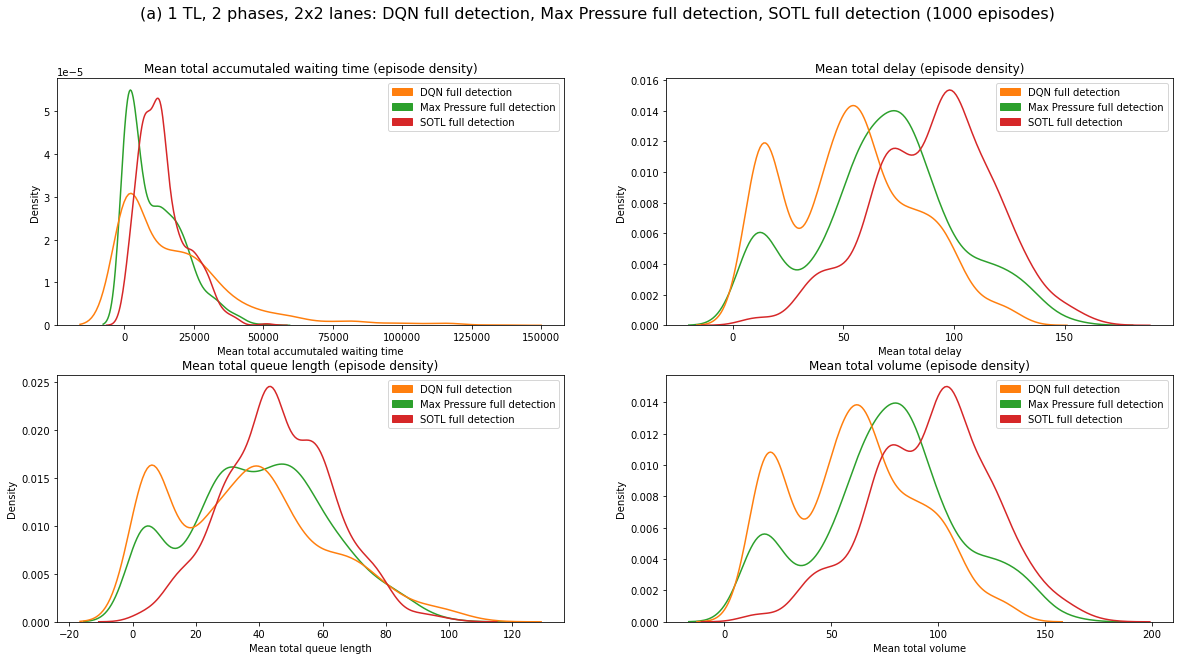

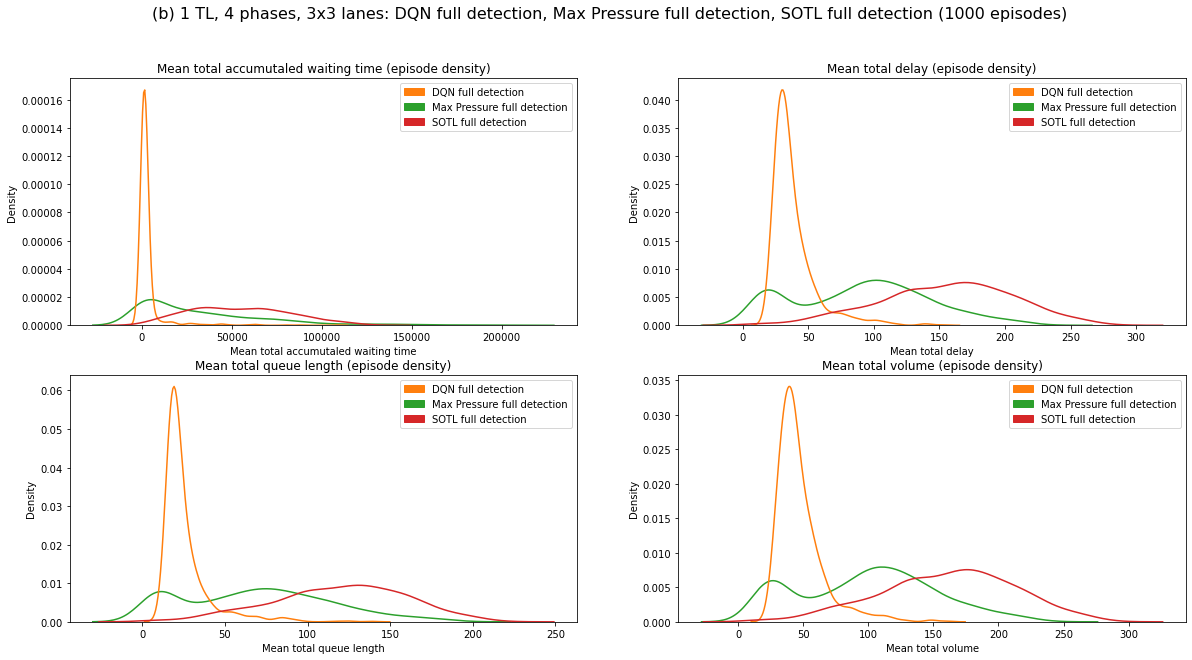

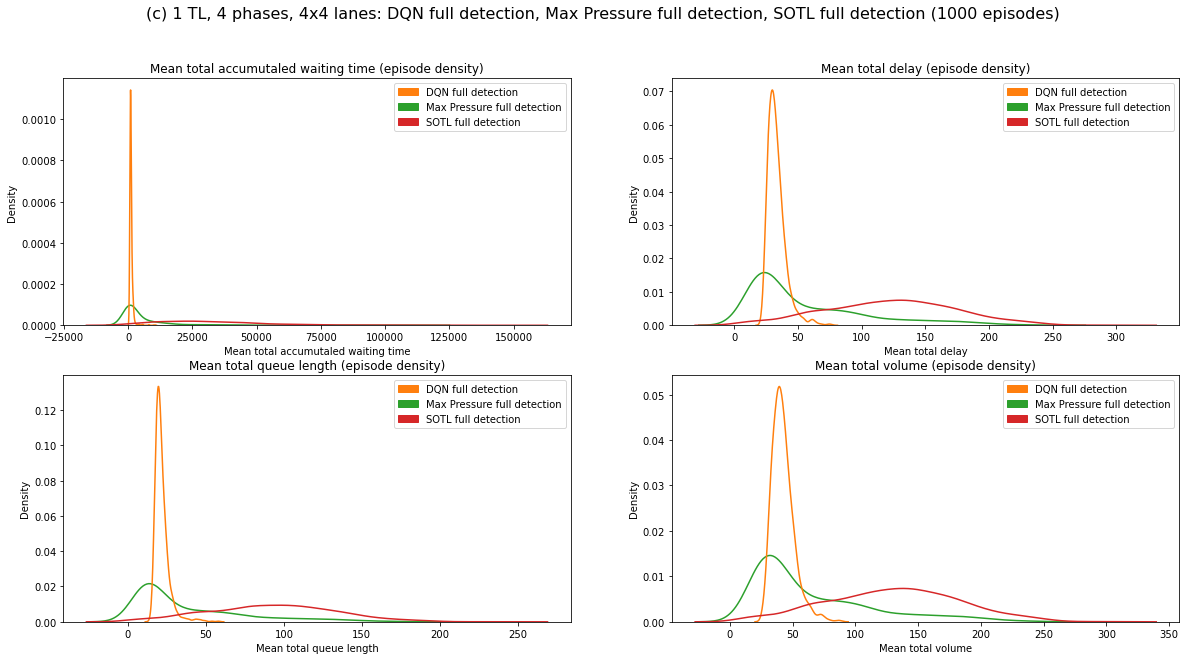

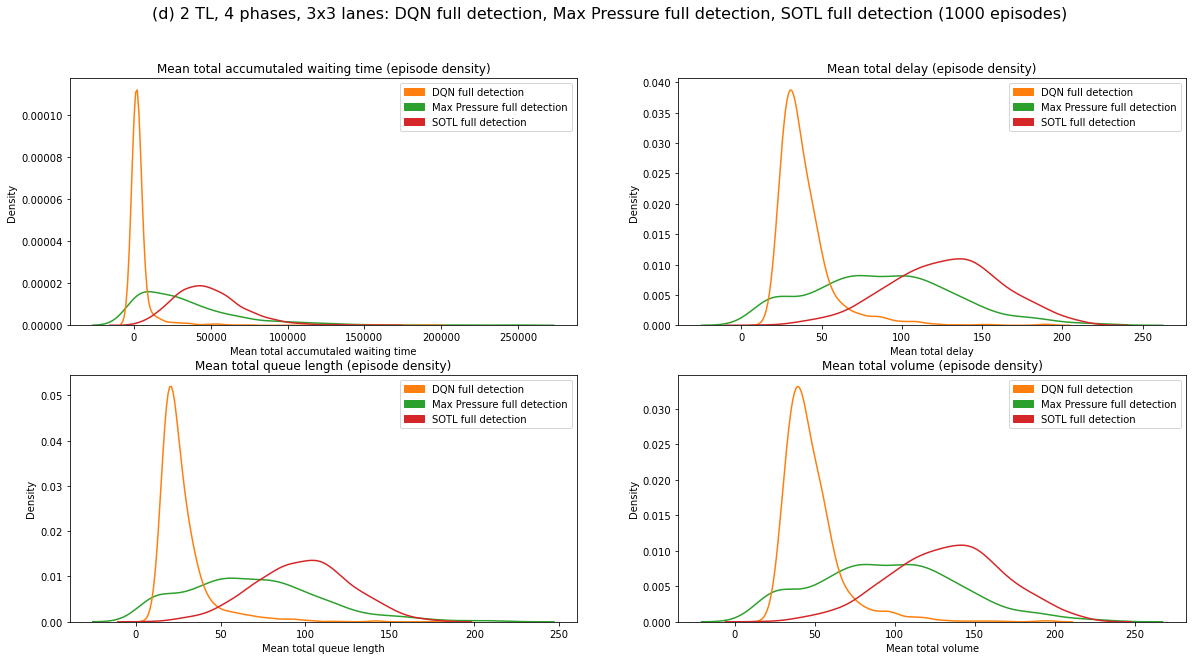

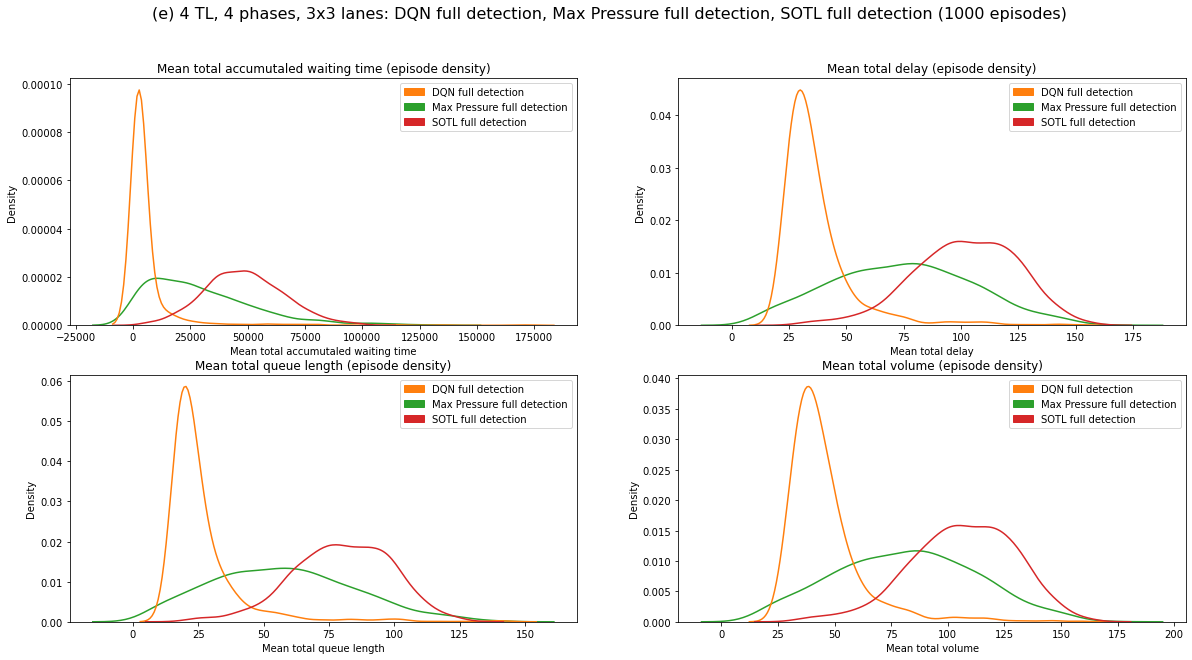

In [15]:
for config in df_configs:
    plot_density(config, ['rlcontroller_def', 'maxpressurebaseline_def', 'sotlbaseline_def'])

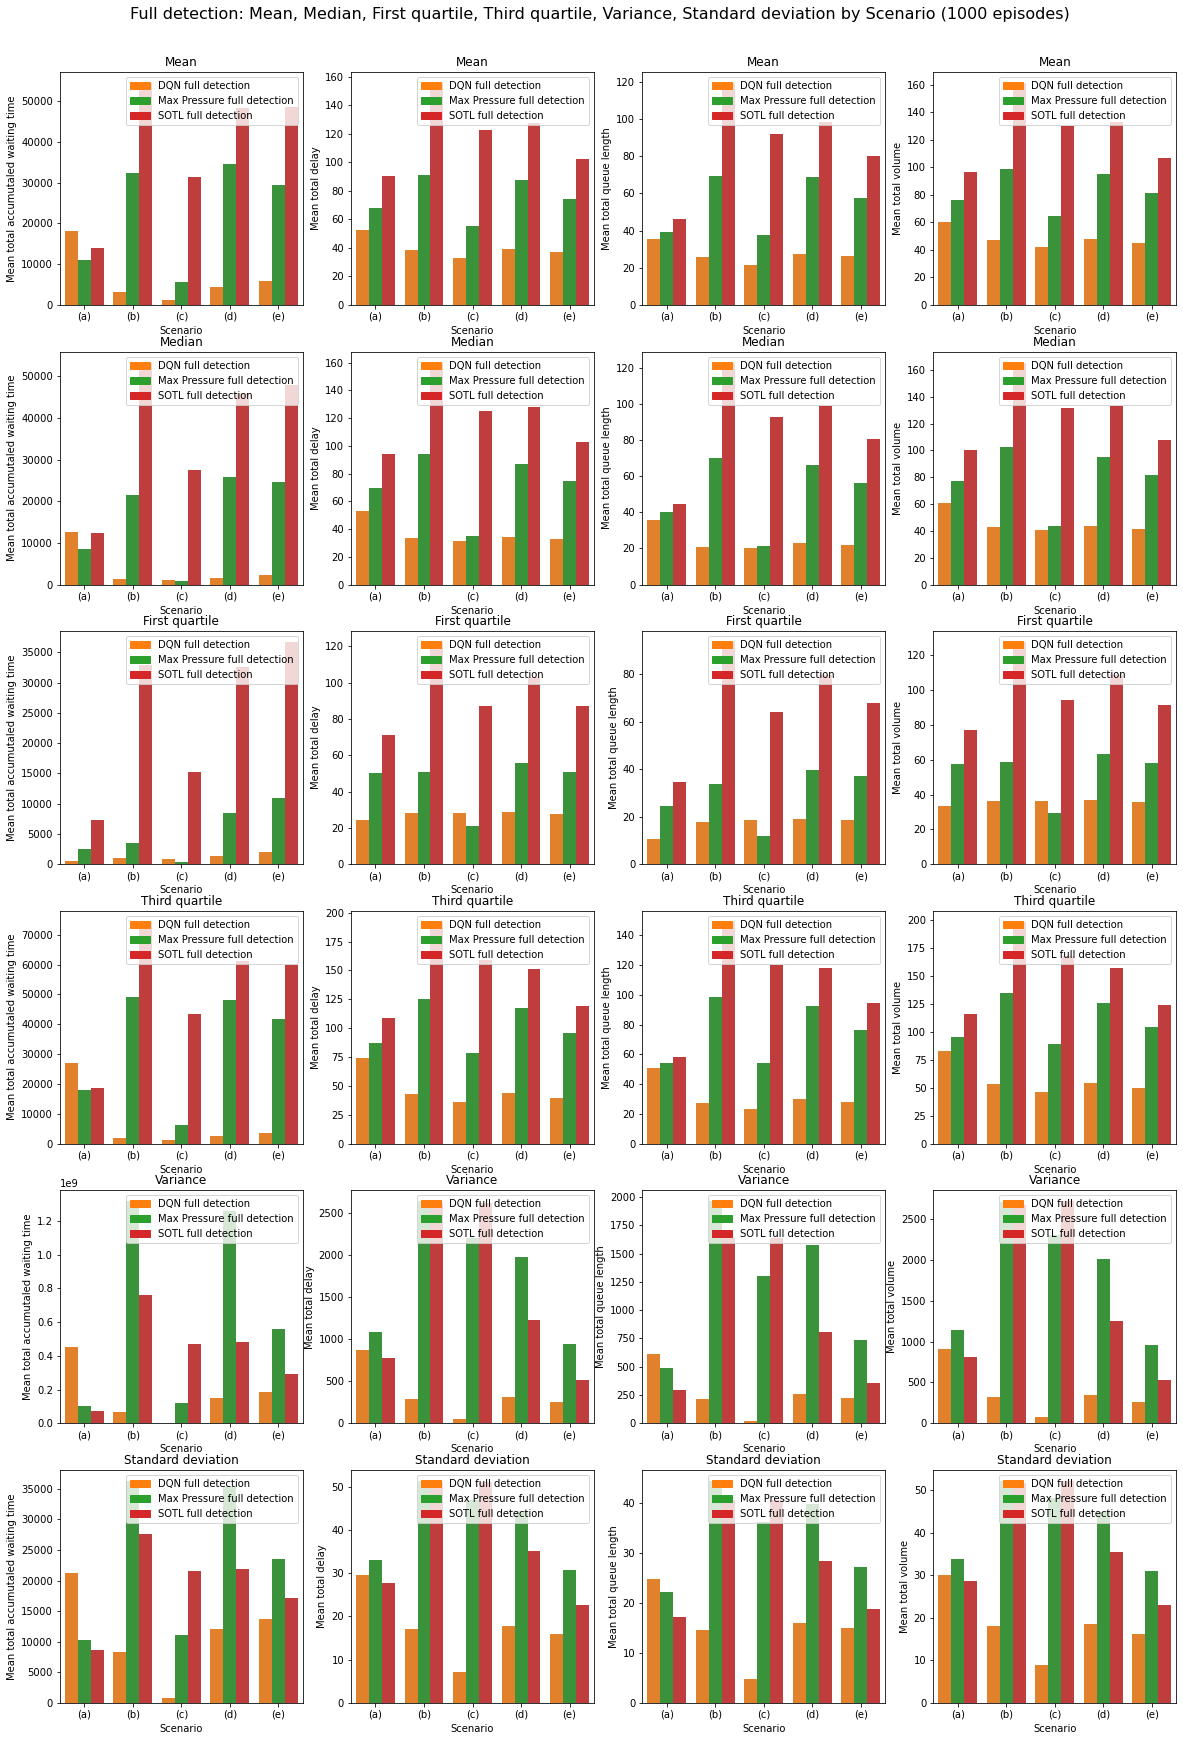

In [16]:
plot_stats()

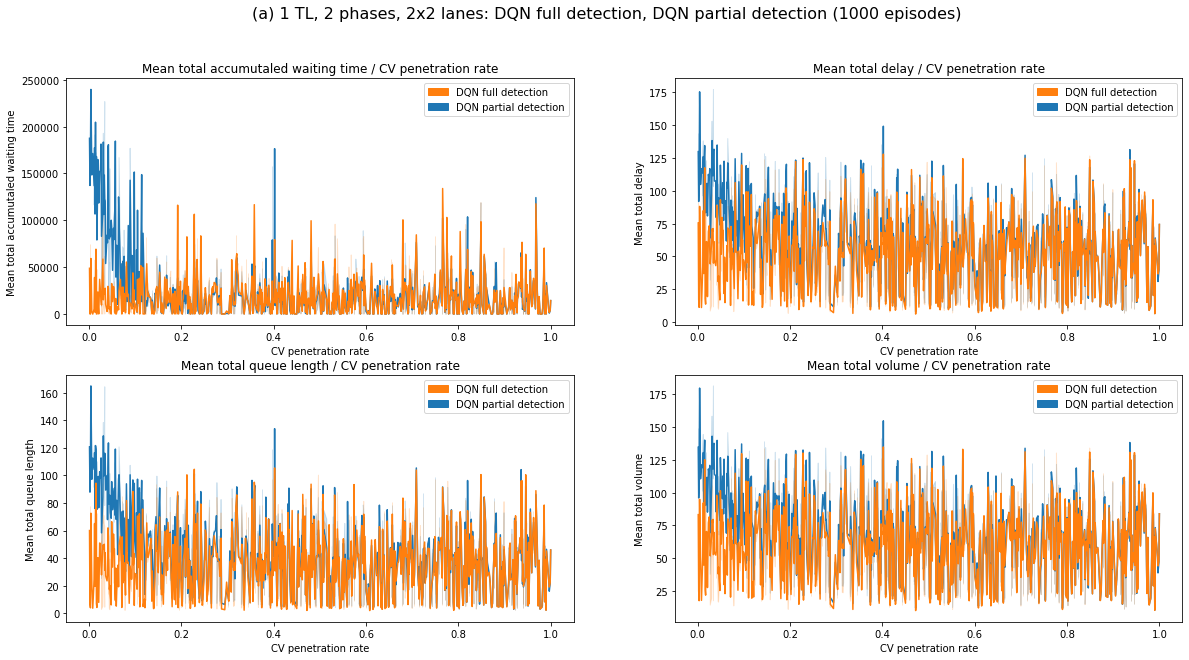

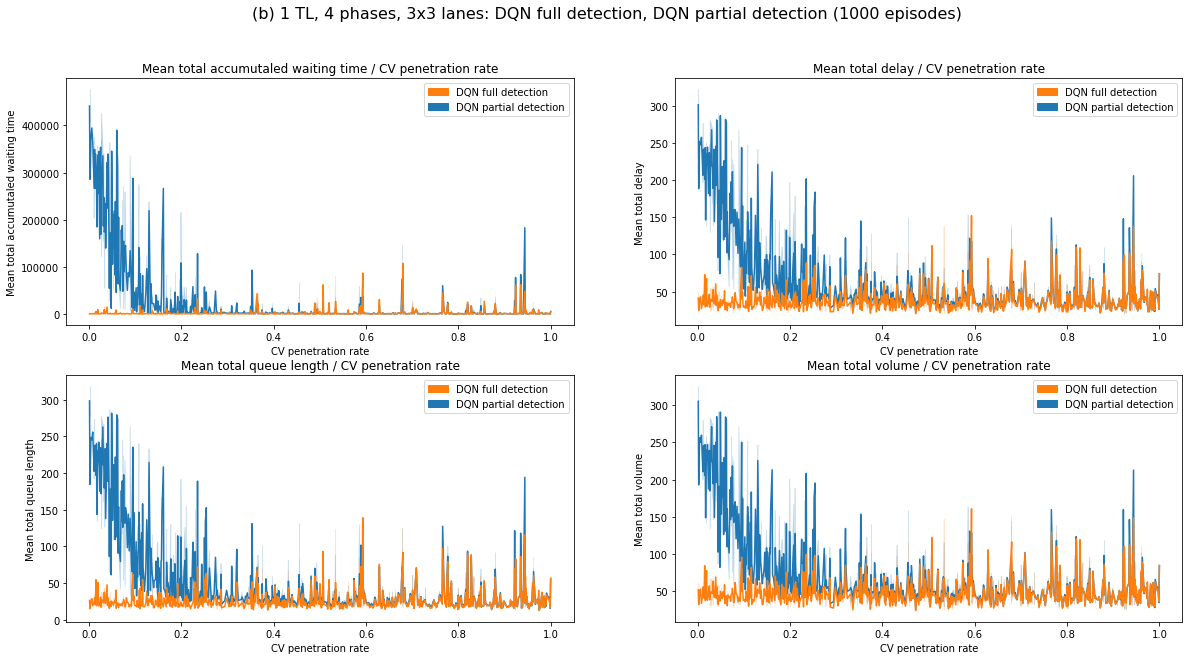

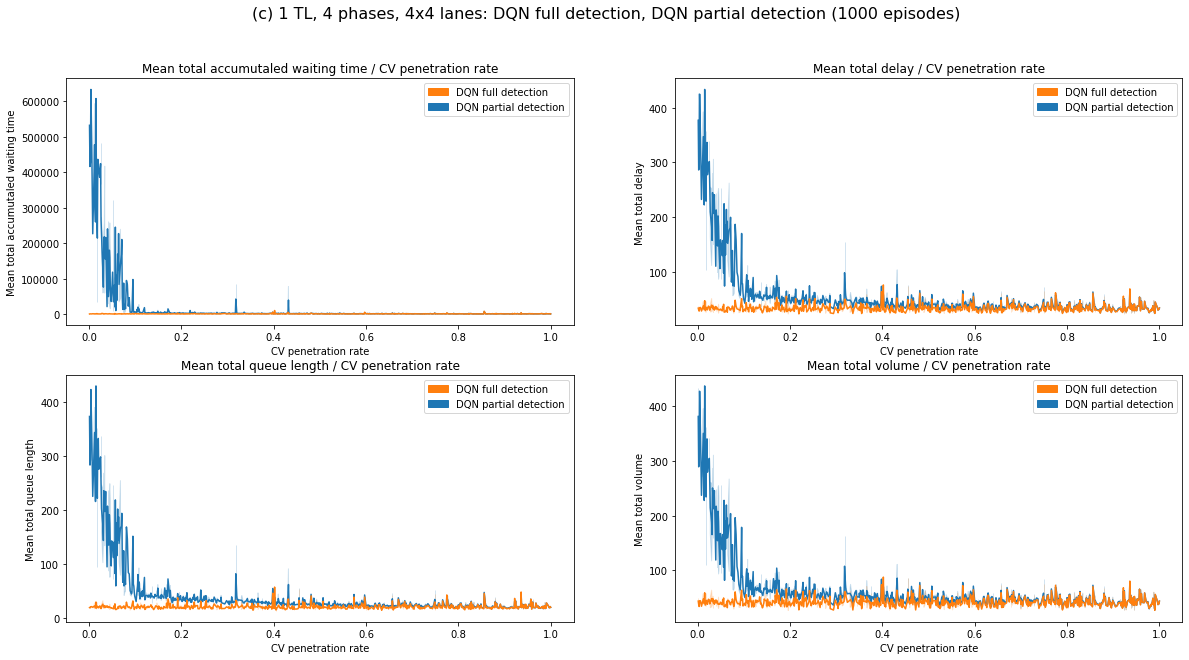

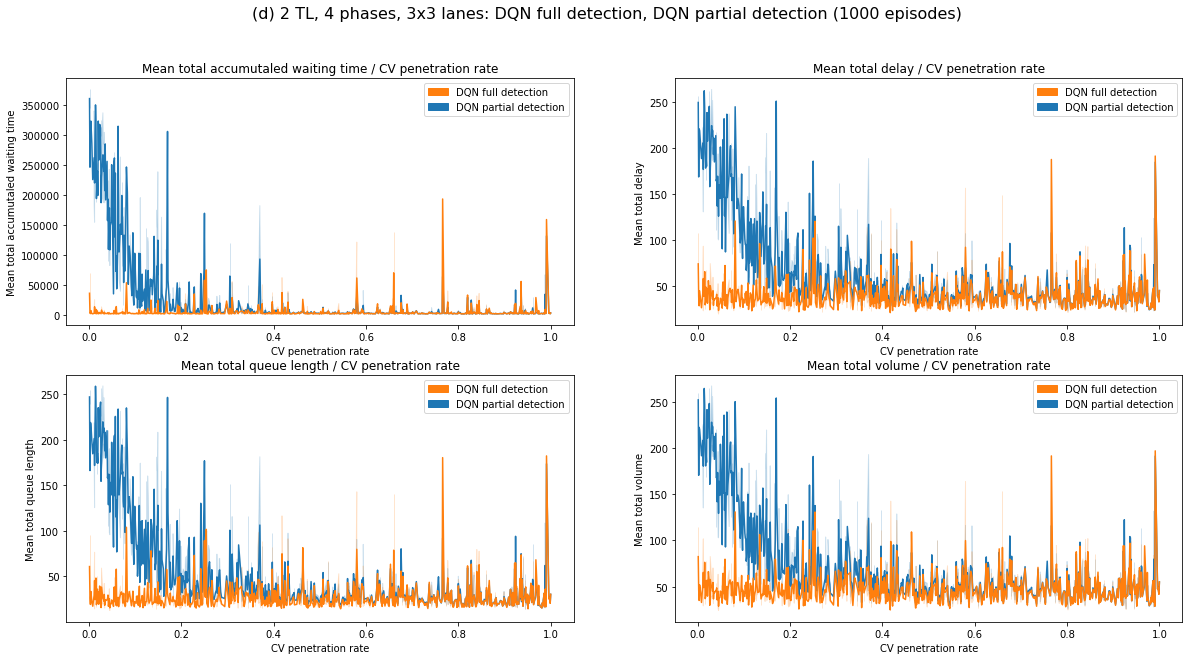

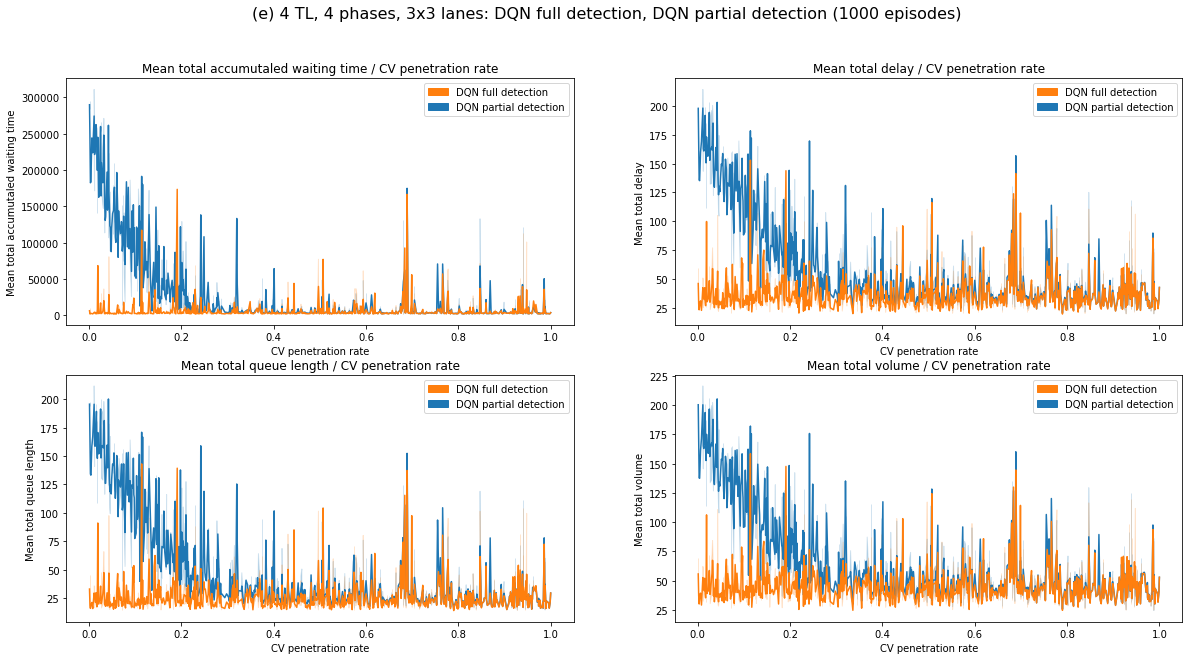

In [17]:
for config in df_configs:
    plot_line(config, ['rlcontroller_con', 'rlcontroller_def'], 'ctrl_con_p_rate')

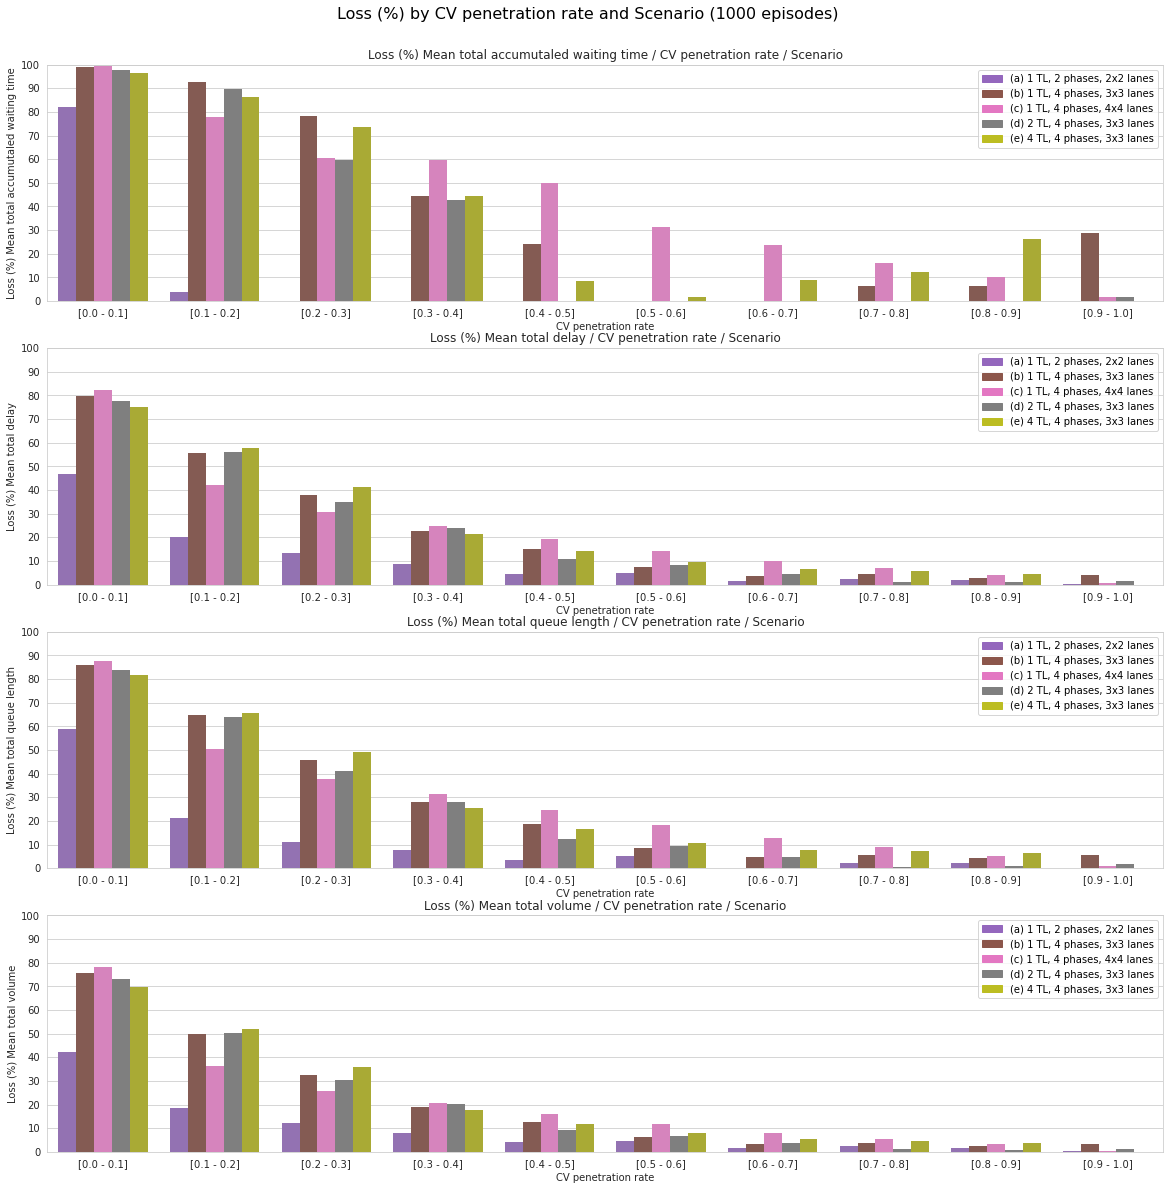

In [18]:
plot_stats_con()

In [19]:
###################################################################################################################

In [20]:
c1 = {col: "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[e] for e, col in enumerate(df_stats.drop(['config_l'], axis=1).columns)}

df_stats_pretty = pd.DataFrame(columns=[c for c in c1])

cols = {}
for a in ['mean', 'median', 'quantile_25', 'quantile_75', 'var', 'std']:
    for b in ['sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']:
        cols[a + '_' + b] = [a, b]

c2 = dict(
    **{'config': titles['config'], 'id_con': titles['id_con']},
    **{col: " ".join([titles[t] for t in cols[col]]) for col in cols}
)

for index, row in df_stats.iterrows():
    df_stats_pretty = pd.concat([
        df_stats_pretty,
        pd.DataFrame(dict(**{
            'config': [titles[df_stats.iloc[index]['config']][0]],
            'id_con': [{'rlcontroller_def': 'DQN (FD)', 
                        'maxpressurebaseline_def': 'MP (FD)',
                        'sotlbaseline_def': 'SOTL (FD)' 
                       }[df_stats.iloc[index]['id_con']]]
        }, **{
            col: [round(df_stats.iloc[index][col], 1)] for col in cols
        }))
    ])

df_stats_pretty = df_stats_pretty.reset_index(drop=True)
df_stats_pretty = df_stats_pretty.rename(columns=c1)

df_stats_pretty_cols = pd.DataFrame({
    "Column": [c1[c] for c in c1],
    "Title": [c2[c] for c in c2]
})

In [21]:
c1 = {col: "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[e] for e, col in enumerate(df_stats_con.drop(['ctrl_con_p_rate_round_l'], axis=1).columns)}

df_stats_con_pretty = pd.DataFrame(columns=[c for c in c1])

cols = ['sum_acc_waiting_time', 'sum_delay', 'sum_queue_length', 'veh_n']

c2 = dict(
    **{'config': titles['config'], 'ctrl_con_p_rate_round': titles['ctrl_con_p_rate_round'] + ' range'},
    **{col: titles[col] for col in cols}
)

for index, row in df_stats_con.iterrows():
    df_stats_con_pretty = pd.concat([
        df_stats_con_pretty,
        pd.DataFrame(dict(**{
            'config': [titles[df_stats_con.iloc[index]['config']][0]],
            'ctrl_con_p_rate_round': [
                {i/10: f"[{i/10} - {(i+1)/10}]"for i in range(10)}[df_stats_con.iloc[index]['ctrl_con_p_rate_round']]]
        }, **{
            col: [min(max(round(df_stats_con.iloc[index][col] * -100, 1), 0), 100)] for col in cols
        }))
    ])

df_stats_con_pretty = df_stats_con_pretty.reset_index(drop=True)
df_stats_con_pretty = df_stats_con_pretty.rename(columns=c1)

df_stats_con_pretty_cols = pd.DataFrame({
    "Column": [c1[c] for c in c1],
    "Title": [('Loss % in ' if c in cols else '') + c2[c] for c in c2]
})

In [22]:
# %%script false --no-raise-error
pd.options.display.float_format = '{:.1f}'.format

In [23]:
display(df_stats_pretty_cols)
display(df_stats_pretty)

,Column,Title
0,A,Scenario
1,B,Algorithm
2,C,Mean Mean total accumutaled waiting time
3,D,Mean Mean total delay
4,E,Mean Mean total queue length
5,F,Mean Mean total volume
6,G,Median Mean total accumutaled waiting time
7,H,Median Mean total delay
8,I,Median Mean total queue length
9,J,Median Mean total volume


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
0,(a),DQN (FD),18280.2,52.8,35.7,60.6,12542.0,53.3,35.7,61.1,475.1,24.6,10.6,33.4,27001.3,74.0,50.9,82.9,452039780.8,873.3,611.7,904.3,21261.2,29.6,24.7,30.1
1,(a),MP (FD),11130.9,68.1,39.3,76.0,8528.5,69.8,40.0,77.4,2543.0,50.4,24.5,57.6,17845.1,87.4,54.3,95.5,103870420.5,1088.5,489.4,1138.4,10191.7,33.0,22.1,33.7
2,(a),SOTL (FD),13864.7,90.5,46.2,96.8,12433.5,94.0,44.6,100.0,7325.2,71.3,34.4,77.1,18521.8,108.8,58.0,115.3,74104235.1,771.7,295.4,817.3,8608.4,27.8,17.2,28.6
3,(a),DQN (FD),18280.2,52.8,35.7,60.6,12542.0,53.3,35.7,61.1,475.1,24.6,10.6,33.4,27001.3,74.0,50.9,82.9,452039780.8,873.3,611.7,904.3,21261.2,29.6,24.7,30.1
4,(a),MP (FD),11130.9,68.1,39.3,76.0,8528.5,69.8,40.0,77.4,2543.0,50.4,24.5,57.6,17845.1,87.4,54.3,95.5,103870420.5,1088.5,489.4,1138.4,10191.7,33.0,22.1,33.7
5,(a),SOTL (FD),13864.7,90.5,46.2,96.8,12433.5,94.0,44.6,100.0,7325.2,71.3,34.4,77.1,18521.8,108.8,58.0,115.3,74104235.1,771.7,295.4,817.3,8608.4,27.8,17.2,28.6
6,(a),DQN (FD),18280.2,52.8,35.7,60.6,12542.0,53.3,35.7,61.1,475.1,24.6,10.6,33.4,27001.3,74.0,50.9,82.9,452039780.8,873.3,611.7,904.3,21261.2,29.6,24.7,30.1
7,(a),MP (FD),11130.9,68.1,39.3,76.0,8528.5,69.8,40.0,77.4,2543.0,50.4,24.5,57.6,17845.1,87.4,54.3,95.5,103870420.5,1088.5,489.4,1138.4,10191.7,33.0,22.1,33.7
8,(a),SOTL (FD),13864.7,90.5,46.2,96.8,12433.5,94.0,44.6,100.0,7325.2,71.3,34.4,77.1,18521.8,108.8,58.0,115.3,74104235.1,771.7,295.4,817.3,8608.4,27.8,17.2,28.6
9,(a),DQN (FD),18280.2,52.8,35.7,60.6,12542.0,53.3,35.7,61.1,475.1,24.6,10.6,33.4,27001.3,74.0,50.9,82.9,452039780.8,873.3,611.7,904.3,21261.2,29.6,24.7,30.1


In [24]:
display(df_stats_con_pretty_cols)
display(df_stats_con_pretty)

,Column,Title
0,A,Scenario
1,B,CV penetration rate range
2,C,Loss % in Mean total accumutaled waiting time
3,D,Loss % in Mean total delay
4,E,Loss % in Mean total queue length
5,F,Loss % in Mean total volume


,A,B,C,D,E,F
0,(a),[0.0 - 0.1],82.0,46.7,59.1,42.1
1,(a),[0.1 - 0.2],3.8,20.3,21.2,18.4
2,(a),[0.2 - 0.3],0.0,13.3,10.9,12.1
3,(a),[0.3 - 0.4],0.0,8.6,7.6,7.8
4,(a),[0.4 - 0.5],0.0,4.5,3.4,4.2
5,(a),[0.5 - 0.6],0.0,4.7,5.1,4.4
6,(a),[0.6 - 0.7],0.0,1.4,0.0,1.5
7,(a),[0.7 - 0.8],0.0,2.5,2.4,2.4
8,(a),[0.8 - 0.9],0.0,1.7,2.2,1.6
9,(a),[0.9 - 1.0],0.0,0.3,0.0,0.3


In [25]:
print(df_stats_pretty_cols.to_latex(index=False))
print(df_stats_pretty[["ABCDEFGHIJKLMNOPQRSTUVWXYZ"[i] for i in range(13)]].to_latex(index=True))
print(df_stats_pretty[["ABCDEFGHIJKLMNOPQRSTUVWXYZ"[i] for i in range(13, 26)]].to_latex(index=True))

\begin{tabular}{ll}
\toprule
Column &                                                  Title \\
\midrule
     A &                                               Scenario \\
     B &                                              Algorithm \\
     C &               Mean Mean total accumutaled waiting time \\
     D &                                  Mean Mean total delay \\
     E &                           Mean Mean total queue length \\
     F &                                 Mean Mean total volume \\
     G &             Median Mean total accumutaled waiting time \\
     H &                                Median Mean total delay \\
     I &                         Median Mean total queue length \\
     J &                               Median Mean total volume \\
     K &     First quartile Mean total accumutaled waiting time \\
     L &                        First quartile Mean total delay \\
     M &                 First quartile Mean total queue length \\
     N &                

In [26]:
print(df_stats_con_pretty_cols.to_latex(index=False))
print(df_stats_con_pretty.to_latex(index=True))

\begin{tabular}{ll}
\toprule
Column &                                         Title \\
\midrule
     A &                                      Scenario \\
     B &                     CV penetration rate range \\
     C & Loss \% in Mean total accumutaled waiting time \\
     D &                    Loss \% in Mean total delay \\
     E &             Loss \% in Mean total queue length \\
     F &                   Loss \% in Mean total volume \\
\bottomrule
\end{tabular}

\begin{tabular}{lllrrrr}
\toprule
{} &    A &            B &    C &    D &    E &    F \\
\midrule
0  &  (a) &  [0.0 - 0.1] & 82.0 & 46.7 & 59.1 & 42.1 \\
1  &  (a) &  [0.1 - 0.2] &  3.8 & 20.3 & 21.2 & 18.4 \\
2  &  (a) &  [0.2 - 0.3] &  0.0 & 13.3 & 10.9 & 12.1 \\
3  &  (a) &  [0.3 - 0.4] &  0.0 &  8.6 &  7.6 &  7.8 \\
4  &  (a) &  [0.4 - 0.5] &  0.0 &  4.5 &  3.4 &  4.2 \\
5  &  (a) &  [0.5 - 0.6] &  0.0 &  4.7 &  5.1 &  4.4 \\
6  &  (a) &  [0.6 - 0.7] &  0.0 &  1.4 &  0.0 &  1.5 \\
7  &  (a) &  [0.7 - 0.8] &  0.0 & 